In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_solo1000 = pd.read_csv('df_solo1000.csv') #In a previous notebook, I divided the datasets into solo, duo, and squad mode, and downlaoded them as csv files.
df_duo1000 = pd.read_csv('df_duo1000.csv')
df_squad1000 = pd.read_csv('df_squad1000.csv')

df_solo = pd.read_csv('df_solo.csv')

In [5]:
df_duo = pd.read_csv('df_duo.csv')
df_squad = pd.read_csv('df_squad.csv')

In [10]:
df_solo_top50 = df_solo[df_solo.team_placement < 50] 
df_duo_top25 = df_duo[df_squad.team_placement < 25]
df_squad_top13 = df_squad[df_squad.team_placement > 13]

C:\Users\Ameen\Miniconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [69]:
df_solo_top50.shape


(7201035, 9)

In [70]:
df_duo_top25.shape


(18972889, 9)

In [71]:
df_squad_top13.shape

(15669568, 9)

^^^ Realized I needed to narrow down the datasets to only the top half of team placements in a match. In the average match, half of the players are eliminated within the first 3 minutes. Therefore the most insights can be gained from the top half of players.

The data contains **no missing values**. It also contains **some outliers** which I have kept for this analysis.

## 1. Are there variables that are particularly significant in terms of explaining the answer to your project question?

The underlying questions for my project are what variables positively correlate with winning a match Players Unknown Battleground. Winning in this game means being the last player / team standing. To increase threshold of victory we can consider it to be within the top 5 team placement. 

In my previous visualizations I've found that a player doing more damage and getting more kills is the strongest variable correlating with winning a match



## 2. Are there strong correlations between pairs of independent variables or between an independent and a dependent variable?

My mentor has told me that Pearson Correlation values above .4 or below -.4 are to be considered significant, anything in between those values are too close to 0, are thought to be weak correlations.

When examining the correlations below, its important to remember when looking at the team placement variable that a negative correlation is a good thing, since the lower the team placement number translates into closer to victory (first place).

Some noteworthy correlations for solo matches to the dependent variable (team placement) are: 

**Solo**

1. Player Kills & Team Placement : -.39
2. Player Distance Walked & Team Placement : -.09 
3. Distance driven & team placement: -.3 

I did not note independent variables that are highly correlated with one another already such as player kills and player damage. Player survival time and team placement is not an interesting high correlation because the trend is a given. 

**Duo**

1. Player Kills & Team Placement : -.39
2. Player Distance Walked & Team Placement : -.22 
3. Distance driven & Team placement: -.52

**Squad**

1. Player Kills & Team Placement : -.144
2. Player Distance Walked & Team Placement : -.11 
3. Distance driven & Team placement: -.31

In [11]:
df_solo_top50.corr() #

,Unnamed: 0,player_dist_walk,player_dmg,team_placement,player_dist_ride,player_survive_time,game_size,party_size,player_kills
Unnamed: 0,1.000000,0.000769,-0.000065,-0.000033,0.000378,0.000594,0.002635,NaN,0.000125
player_dist_walk,0.000769,1.000000,0.044880,-0.090907,0.214439,0.103178,-0.001918,NaN,0.045845
player_dmg,-0.000065,0.044880,1.000000,-0.397385,0.123652,0.390272,0.039004,NaN,0.957013
team_placement,-0.000033,-0.090907,-0.397385,1.000000,-0.307040,-0.950002,-0.000705,NaN,-0.391351
player_dist_ride,0.000378,0.214439,0.123652,-0.307040,1.000000,0.304523,0.067480,NaN,0.109206
player_survive_time,0.000594,0.103178,0.390272,-0.950002,0.304523,1.000000,0.042183,NaN,0.382645
game_size,0.002635,-0.001918,0.039004,-0.000705,0.067480,0.042183,1.000000,NaN,0.034975
party_size,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
player_kills,0.000125,0.045845,0.957013,-0.391351,0.109206,0.382645,0.034975,NaN,1.000000


In [12]:
df_duo_top25.corr()

,Unnamed: 0,player_dist_walk,player_dmg,team_placement,player_dist_ride,player_survive_time,game_size,party_size,player_kills
Unnamed: 0,1.000000,-0.000116,-0.000013,-0.000304,-0.000207,-0.000514,-0.001866,NaN,-0.000043
player_dist_walk,-0.000116,1.000000,0.113032,-0.227065,0.265560,0.000951,-0.015680,NaN,0.107919
player_dmg,-0.000013,0.113032,1.000000,-0.414544,0.223666,-0.000073,0.000892,NaN,0.902247
team_placement,-0.000304,-0.227065,-0.414544,1.000000,-0.529029,-0.000313,0.119876,NaN,-0.389912
player_dist_ride,-0.000207,0.265560,0.223666,-0.529029,1.000000,0.001472,0.008010,NaN,0.197641
player_survive_time,-0.000514,0.000951,-0.000073,-0.000313,0.001472,1.000000,-0.000263,NaN,-0.000179
game_size,-0.001866,-0.015680,0.000892,0.119876,0.008010,-0.000263,1.000000,NaN,0.000705
party_size,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
player_kills,-0.000043,0.107919,0.902247,-0.389912,0.197641,-0.000179,0.000705,NaN,1.000000


In [13]:
df_squad_top13.corr()

,Unnamed: 0,player_dist_walk,player_dmg,team_placement,player_dist_ride,player_survive_time,game_size,party_size,player_kills
Unnamed: 0,1.000000,-0.000114,0.000091,-0.000086,0.000166,0.000903,-0.000560,NaN,-0.000087
player_dist_walk,-0.000114,1.000000,0.033357,-0.111253,0.207823,0.001230,0.006574,NaN,0.026674
player_dmg,0.000091,0.033357,1.000000,-0.170849,0.037204,-0.000447,0.012693,NaN,0.792028
team_placement,-0.000086,-0.111253,-0.170849,1.000000,-0.312411,-0.000582,0.207275,NaN,-0.144589
player_dist_ride,0.000166,0.207823,0.037204,-0.312411,1.000000,0.004541,0.038716,NaN,0.010118
player_survive_time,0.000903,0.001230,-0.000447,-0.000582,0.004541,1.000000,-0.000819,NaN,-0.000315
game_size,-0.000560,0.006574,0.012693,0.207275,0.038716,-0.000819,1.000000,NaN,0.012449
party_size,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
player_kills,-0.000087,0.026674,0.792028,-0.144589,0.010118,-0.000315,0.012449,NaN,1.000000


## 3. What are the most appropriate tests to use to analyse these relationships

The player kills varaible appears to be somewhat normally distrubuted but heavily skewed to the right

C:\Users\Ameen\Miniconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Ameen\Miniconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Ameen\Miniconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


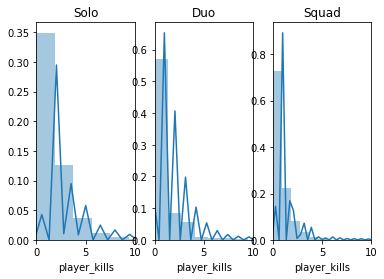

In [36]:
plt.subplot(1, 3, 1)
plt.xlim(0,10)
sns.distplot(df_solo_top50.player_kills, hist=True)
plt.title('Solo')

plt.subplot(1, 3, 2)
plt.xlim(0,10)
plt.title('Duo')

sns.distplot(df_duo_top50.player_kills, hist=True)

plt.subplot(1, 3, 3)
plt.xlim(0,10)
plt.title('Squad')

sns.distplot(df_squad_top13.player_kills, hist=True)


Distance Driven appears to be normally distruted

C:\Users\Ameen\Miniconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


(0, 2e-05)

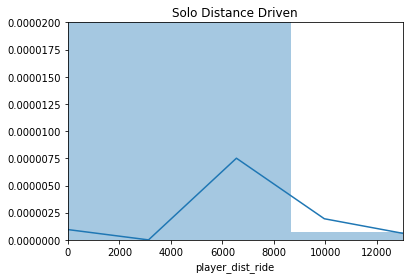

In [98]:
sns.distplot(df_solo_top50.player_dist_ride)
plt.title('Solo Distance Driven')
plt.xlim(0,13000)
plt.ylim(0, .00002)


C:\Users\Ameen\Miniconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


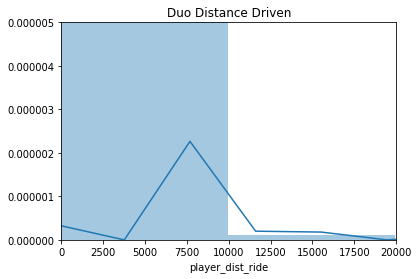

In [97]:
plt.title('Duo Distance Driven')
plt.xlim(0,20000)
plt.ylim(0, .000005)

sns.distplot(df_duo_top50.player_dist_ride)

C:\Users\Ameen\Miniconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


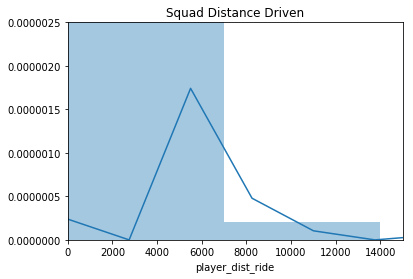

In [96]:
plt.title('Squad Distance Driven')
plt.xlim(0,15000)
plt.ylim(0, .0000025)

sns.distplot(df_squad_top13.player_dist_ride)

C:\Users\Ameen\Miniconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


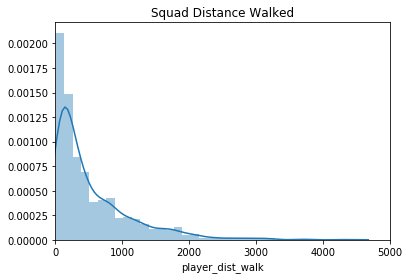

In [95]:
plt.xlim(0, 5000)
plt.title('Squad Distance Walked')
sns.distplot(df_squad_top13.player_dist_walk[:1000])

In [20]:
stats.ttest_ind(df_solo_top50.player_kills, df_solo1000.team_placement)  #The two variables are indefintely correlated

Ttest_indResult(statistic=-695.8584664065725, pvalue=0.0)

In [15]:
stats.ttest_ind(df_solo1000.player_dist_ride, df_solo1000.player_survive_time) 

#Using vehicles defintely increases a players survival time
#Many players avoid vehicles to avoid having attention brought to them, hoping this will keep them alive

Ttest_indResult(statistic=17.55768650275415, pvalue=2.718851850678828e-64)

I'd like to examine the range of stats for all of the first place players in solo matches.

In [23]:
firstplace = df_solo[df_solo.team_placement == 1]

def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

In [30]:
bs_temp = draw_bs_reps(firstplace.player_kills, np.mean, size=1000)
bs_temp_percentile = np.percentile(bs_temp, (2.5, 97.5))
print('Confidence Interval:', bs_temp_percentile)
print('Mean', np.mean(firstplace.player_kills))

Confidence Interval: [6.94742282 6.99468351]
Mean 6.970885627729473


In [32]:
secondplace = df_solo[df_solo.team_placement == 2]

bs_temp2 = draw_bs_reps(secondplace.player_kills, np.mean, size=1000)
bs_temp_percentile2 = np.percentile(bs_temp2, (2.5, 97.5))
print('Confidence Interval:', bs_temp_percentile2)
print('Mean:', np.mean(secondplace.player_kills))

Confidence Interval: [3.58724136 3.61285905]
Mean: 3.599950125015586


When conducting a bootstrap sampling test 1000 times, we cans see that the mean difference in first and second place is consistently 3-4 kills greater.